In [27]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, measure
from scipy import ndimage
from skimage.color import label2rgb

In [51]:
image = io.imread(r"C:\Users\binta\Desktop\DATASET-SAWI-BARU-JPG\TRAIN\BELUM SIAP\belum_siap_1.jpg")

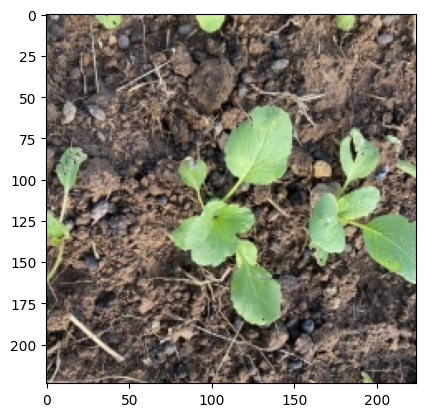

In [52]:
plt.imshow(image, cmap='gray')

In [30]:
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv, (30, 50, 50), (90, 255, 255))

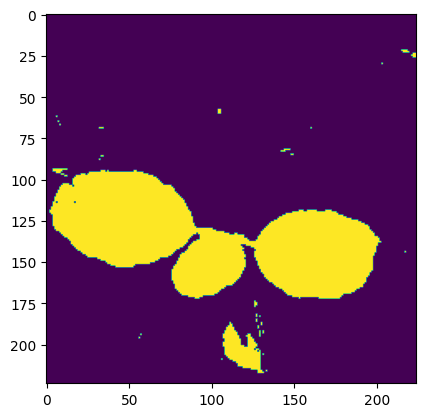

In [31]:
plt.imshow(mask)

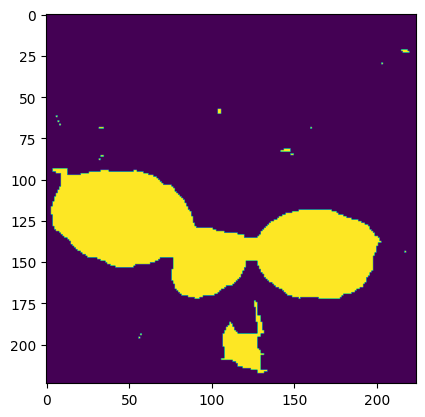

In [32]:
closed_mask = ndimage.binary_closing(mask, np.ones((7, 7)))
plt.imshow(closed_mask)

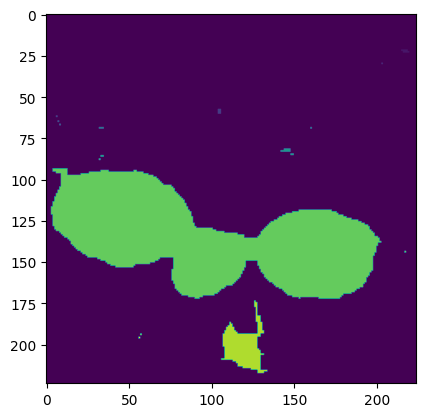

In [33]:
label_img = measure.label(closed_mask)
plt.imshow(label_img)

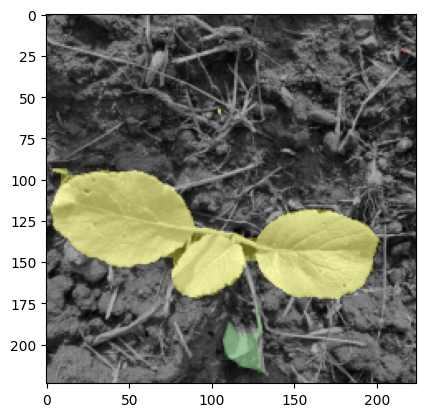

In [35]:
img_label_overlay = label2rgb(label_img, image=image)
plt.imshow(img_label_overlay)


In [36]:
img_label_overlay.shape

(224, 224, 3)

In [58]:
def overlay(image):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    mask = cv.inRange(hsv, (30, 50, 50), (80, 255, 255))
    # closed_mask = ndimage.binary_closing(mask, np.ones((7, 7)))
    # label_img = measure.label(closed_mask)
    green_objects = cv.bitwise_and(image, image, mask=mask)
    # return label2rgb(label_img, image=image)
    return cv.cvtColor(green_objects, cv.COLOR_BGR2RGB)


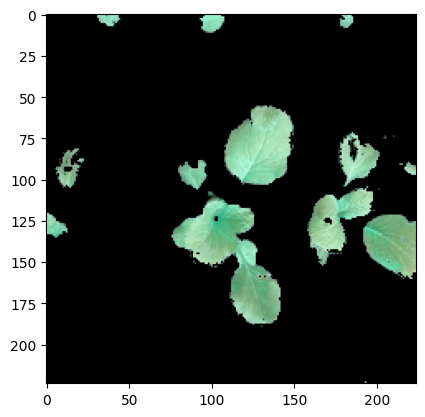

In [59]:
plt.imshow(overlay(image))

In [55]:
x = overlay(image)
x.shape

(224, 224, 3)

In [ ]:
def overlay(image):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    mask = cv.inRange(hsv, (30, 50, 50), (80, 255, 255))
    closed_mask = ndimage.binary_closing(mask, np.ones((7, 7)))
    label_img = measure.label(closed_mask)
    return label2rgb(label_img, image=image)


In [ ]:
def overlay(image, color):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    if color.lower() == 'green':
        mask = cv.inRange(hsv, (30, 50, 50), (80, 255, 255))
    elif color.lower() == 'red':
        mask1 = cv.inRange(hsv, (0, 100, 100), (10, 255, 255))
        mask2 = cv.inRange(hsv, (170, 100, 100), (180, 255, 255))
        mask = cv.bitwise_or(mask1, mask2)
    elif color.lower() == 'blue':
        mask = cv.inRange(hsv, (90, 100, 100), (130, 255, 255))
    else:
        return False

    closed_mask = ndimage.binary_closing(mask, np.ones((7, 7)))
    label_img = measure.label(closed_mask)
    return label2rgb(label_img, image=image)
